In [1]:
from pytorch_lightning import Trainer
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from MVAE import *

In [2]:
device = torch.device(1 if torch.cuda.is_available() else 0)
device

device(type='cuda', index=1)

In [3]:
TRAIN_MASK_DIR = './train/'

transform = transforms.Compose([transforms.Resize((64  , 64)),
                                transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor()])

X_train = datasets.ImageFolder(root=TRAIN_MASK_DIR, transform=transform)

train_loader = DataLoader(X_train, batch_size=100, shuffle=True)


torch.Size([100, 1, 64, 64])


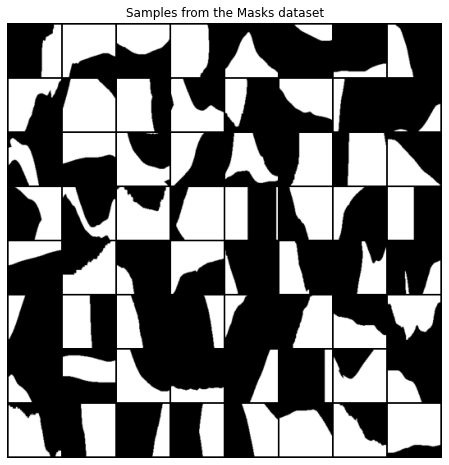

In [4]:
it=iter(train_loader)
real_batch = next(iter(it))
plt.figure(figsize=(8,8))
print(real_batch[0].size())
plt.imshow(np.transpose(utils.make_grid(real_batch[0][:64], padding=2, normalize=True).cpu(),(1,2,0)))
plt.axis('off')
plt.title('Samples from the Masks dataset');
plt.show()

In [ ]:

Decoders = nn.ModuleList([Decoder_MLP(latent_dim=100, in_channel=1, im_size=64, hiddens=[256, 512, 1024])])
MabVae = MabVAE(train_loader, Decoders, eps=0.3, i=0)

#device = torch.device(1 if torch.cuda.is_available() else 0)
trainer = Trainer(gpus=1, max_epochs=20)
trainer.fit(MabVae)

In [5]:
MabVae.NbDraws/torch.sum(MabVae.NbDraws)

tensor([1.], device='cuda:0')

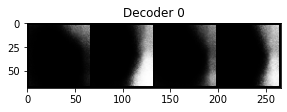

In [6]:
fixed_noise=torch.randn(4,100)
plt.figure(figsize=(10,10))
for i,decoder in enumerate(Decoders):
  fake=decoder(fixed_noise).detach()
  plt.subplot(3,2,i+1)
  plt.title(f'Decoder {i}')
  plt.imshow(np.transpose(utils.make_grid(fake,padding=2,normalize=True).cpu(),(1,2,0)))

plt.savefig(f'Decoders_MASK.png')

(-0.5, 529.5, 529.5, -0.5)

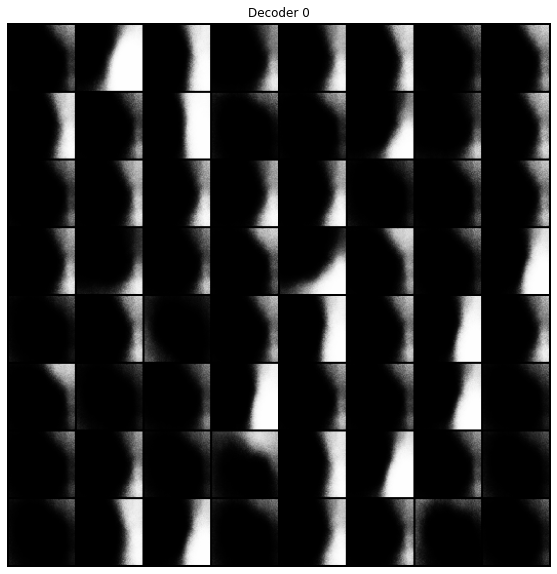

In [7]:
i=0
samples = 64
MLP= Decoders[i]

fixed_noise=torch.randn(samples,100)

plt.figure(figsize=(10,10))
fake=MLP(fixed_noise).detach()
plt.title(f'Decoder {i}')
plt.imshow(np.transpose(utils.make_grid(fake,padding=2,normalize=True).cpu(),(1,2,0)))
plt.axis('off')

In [12]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

TRAIN_MASK_DIR = './train/masks/'

def img_reshape(img):
    img = Image.open(TRAIN_MASK_DIR+img).convert('RGB')
    img = img.resize((64,64))
    img = np.asarray(img)
    return img
images = os.listdir(TRAIN_MASK_DIR)
img_arr = []

for image in images:
    img_arr.append(img_reshape(image))

In [ ]:

def img_reshape(img):
    img = Image.open(TRAIN_MASK_DIR+img).convert('RGB')
    img = img.resize((64,64))
    img = np.asarray(img)
    return img
images = os.listdir(TRAIN_MASK_DIR)
img_arr = []

for image in images:
    img_arr.append(img_reshape(image))

In [13]:
images = os.listdir(TRAIN_MASK_DIR)
img_arr = []

for image in images:
    img_arr.append(img_reshape(image))

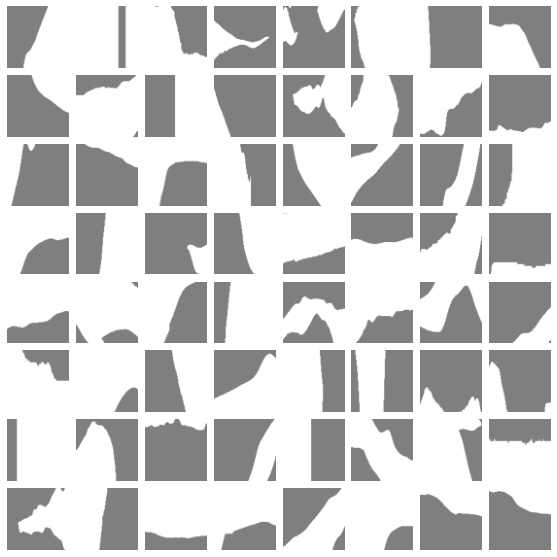

In [14]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(8, 8),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )

for ax, im in zip(grid, img_arr):
    ax.imshow(im, alpha=0.5)
    ax.axis('off')

plt.show()

In [17]:
import pandas as pd
# from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer
from MVAE import *
from SeismicT import *

In [18]:
TRAIN_CSV = f"data\saltMaskOk.csv"
saltGood = pd.read_csv(TRAIN_CSV)

In [5]:
# Creation of a MabVAE instance
MVAE = MabVAE(train_loader, Decoders, eps=0.3, i=0)

In [6]:
# Use the GPU for making computations faster
trainer = Trainer(gpus=1, max_epochs=5)
trainer.fit(MVAE)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | decoders | ModuleList | 28.9 M
1 | encoder  | Encoder    | 3.1 M 
----------------------------------------
32.0 M    Trainable params
0         Non-trainable params
32.0 M    Total params
127.901   Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

ValueError: too many values to unpack (expected 2)

In [19]:
saltGood.__len__()

1617

In [ ]:
maskDS = SeismicMaskDS(saltGood)